In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

### Importing the "Leads" Dataset


In [3]:
df = pd.read_csv("D:\\files\\Leads.csv")

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Checking the Shape of dataset

df.shape

(9240, 37)

In [6]:
# Inspecting the different columns in the dataset

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Checking the summary of the dataset

df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
df['Lead Quality'].isnull().value_counts()

Lead Quality
True     4767
False    4473
Name: count, dtype: int64

## Step 1: Data Cleaning and Preparation


In [10]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [11]:

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Droping all the columns in which greater than 
for c in df.columns:
    if df[c].isnull().sum()>3000:
        df.drop(c, axis=1,inplace=True)

In [13]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [14]:
# we clearly see that the columns with more than 30 % missing values have been dropped; let's check the shape of the dataframe
df.shape


(9240, 31)

In [15]:
# checking the value counts of all the columns

for c in df.columns:
    print(df[c].value_counts())
    print('___________________________________________________')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


In [16]:
df.drop(['Receive More Updates About Our Courses' ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' ,'Magazine'], axis = 1, inplace = True)

In [17]:
df.shape

(9240, 26)

In [18]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### Visualizing the features with Select values

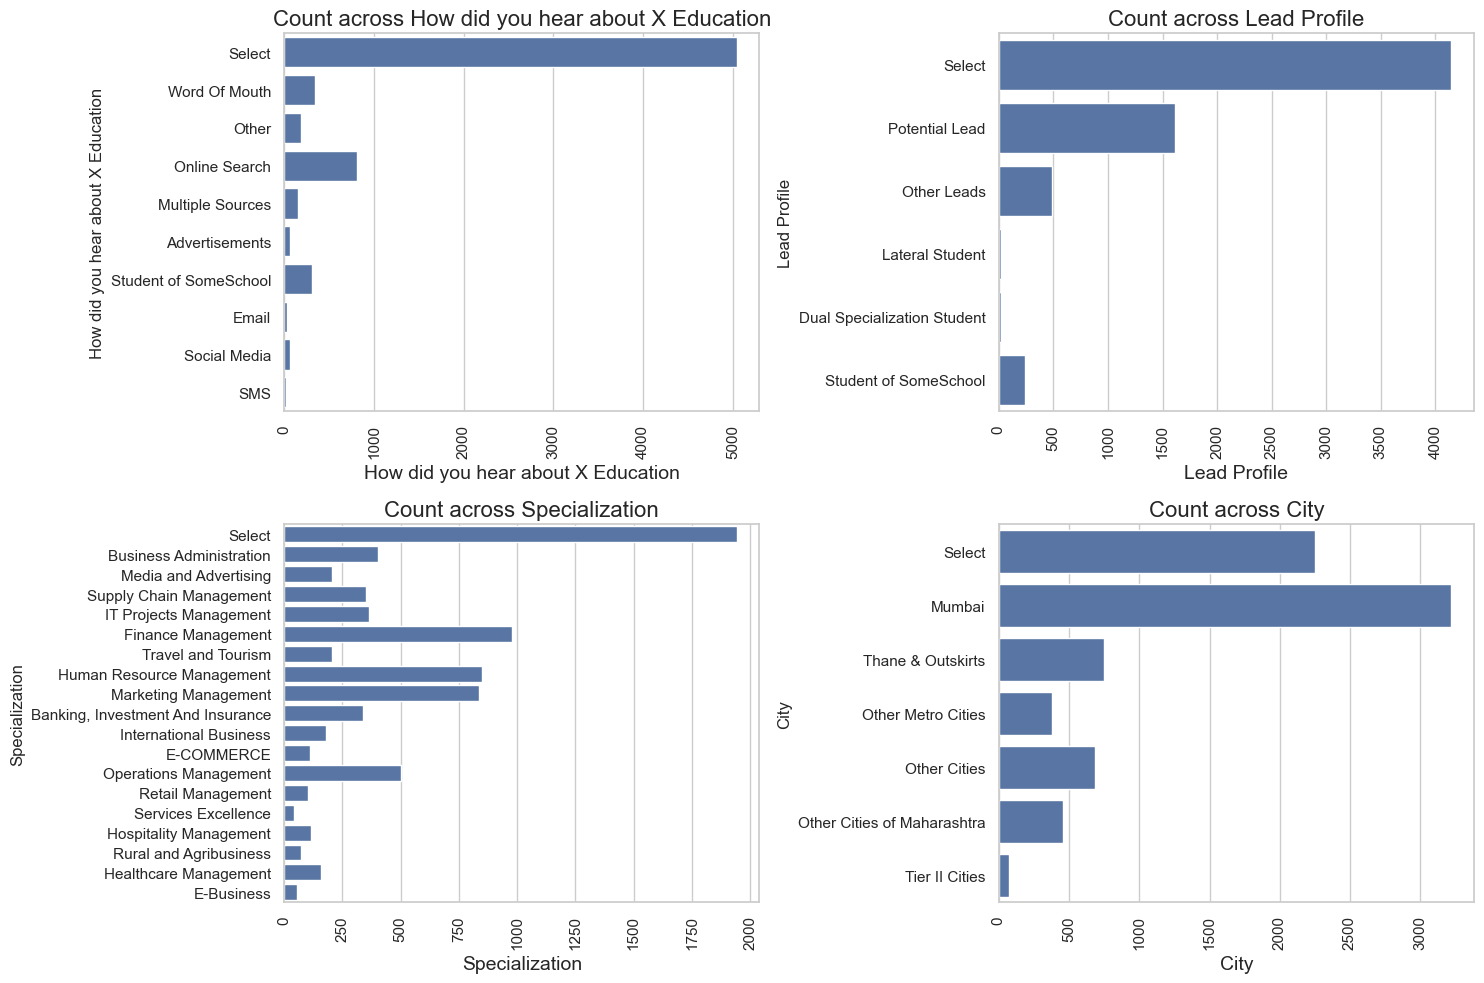

In [19]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(df[x],legend ="brief")
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)
countplot('City',4)



plt.tight_layout()

In [20]:
df.drop('City',axis=1,inplace=True)

In [21]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
df['Lead Profile'].replace("Select" , "unknown",inplace=True)

In [23]:
df['How did you hear about X Education'].replace("Select" , "unknown",inplace=True)

In [24]:
df['Specialization'].replace("Select" , "unknown",inplace= True)

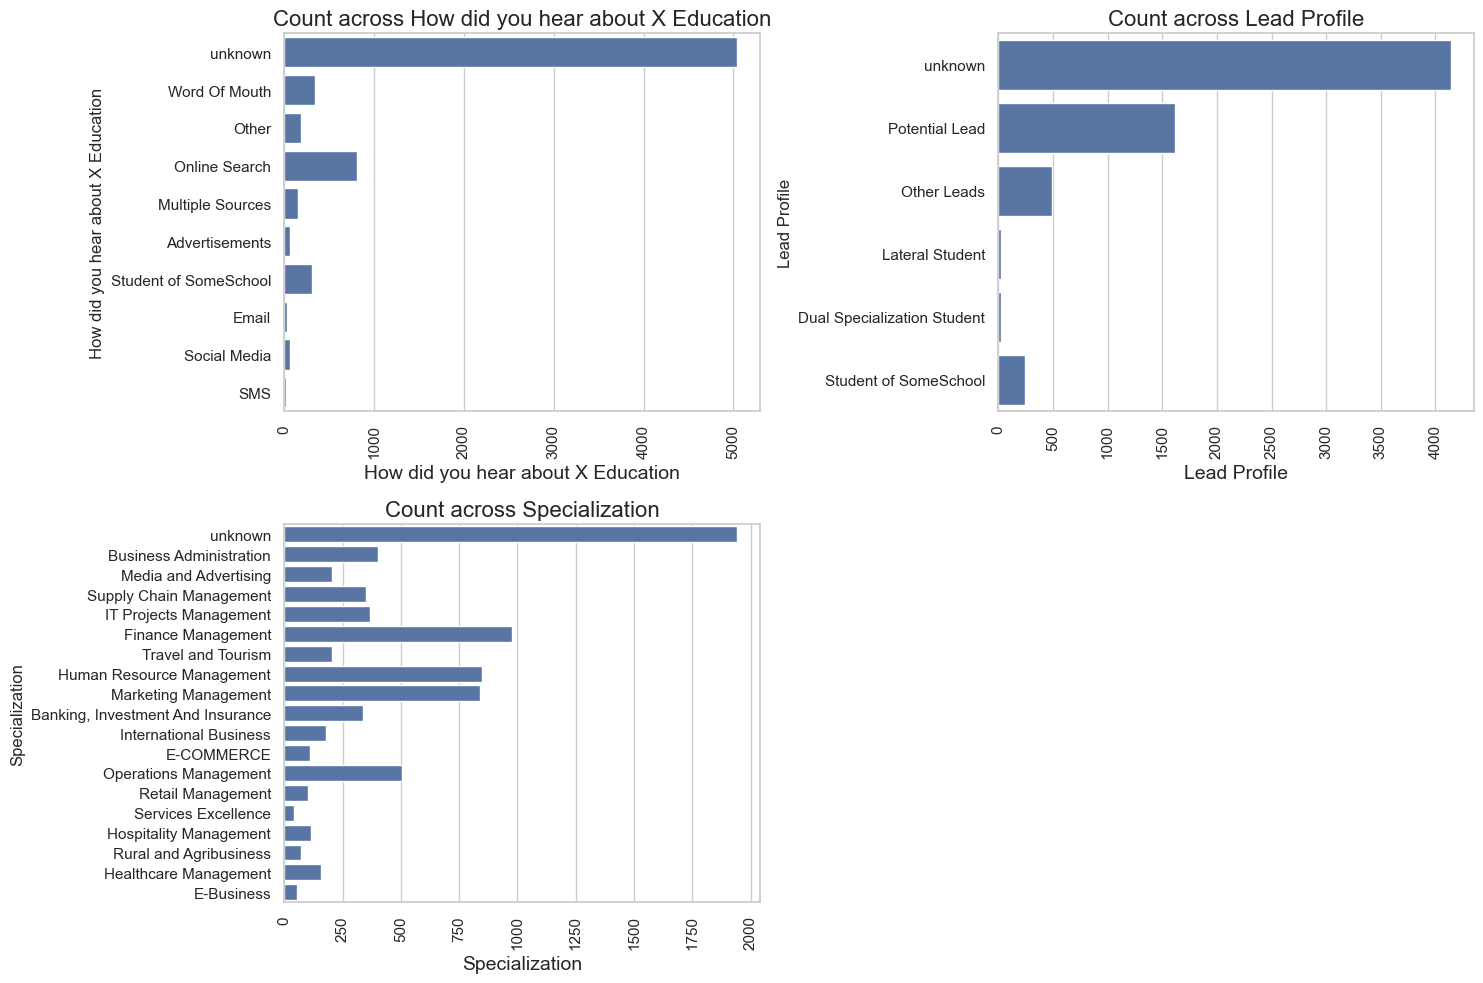

In [25]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(df[x],legend ="brief")
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

In [26]:
df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations'], axis = 1, inplace = True)

In [27]:
df.shape

(9240, 18)

In [28]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [29]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [30]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Lead Profile                              2709
What is your current occupation           2690
Country                                   2461
How did you hear about X Education        2207
Specialization                            1438
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
A free copy of Mastering The Interview       0
Prospect ID                                  0
Lead Number                                  0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Last Notable Activity                        0
dtype: int64

In [31]:
# Dropping the null values rows in the column 

df = df[~pd.isnull(df['What is your current occupation'])]

In [32]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Analysing Categorical features



In [33]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Country                                   1605
Page Views Per Visit                       130
TotalVisits                                130
Last Activity                              103
Lead Source                                 36
Lead Profile                                19
How did you hear about X Education          19
Specialization                              18
A free copy of Mastering The Interview       0
What is your current occupation              0
Prospect ID                                  0
Lead Number                                  0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Last Notable Activity                        0
dtype: int64

In [34]:
# Dropping the null values rows in the column 'TotalVisits'

df = df[~pd.isnull(df['TotalVisits'])]

In [35]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Country                                   1475
Lead Source                                 29
Lead Profile                                19
How did you hear about X Education          19
Specialization                              18
Prospect ID                                  0
Last Activity                                0
A free copy of Mastering The Interview       0
What is your current occupation              0
Page Views Per Visit                         0
Lead Number                                  0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Last Notable Activity                        0
dtype: int64

In [36]:
df = df[~pd.isnull(df['Lead Source'])]

In [37]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Country                                   1447
Lead Profile                                19
How did you hear about X Education          19
Specialization                              18
Prospect ID                                  0
Last Activity                                0
A free copy of Mastering The Interview       0
What is your current occupation              0
Page Views Per Visit                         0
Lead Number                                  0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted                                    0
Do Not Email                                 0
Lead Source                                  0
Lead Origin                                  0
Last Notable Activity                        0
dtype: int64

In [38]:
print(len(df.index))
print(len(df.index)/9240)

6391
0.6916666666666667


In [39]:
#We still have around 69% of the rows which seems good enough.

In [40]:
# Dropping the "Prospect ID" and "Lead Number" 
df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [41]:
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,NaN,unknown,unknown,Unemployed,unknown,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,India,unknown,unknown,Unemployed,unknown,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,unknown,Student,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,unknown,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,India,unknown,Other,Unemployed,unknown,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,India,Business Administration,unknown,Unemployed,Potential Lead,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,unknown,Unemployed,Potential Lead,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,unknown,Unemployed,Potential Lead,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,India,Business Administration,unknown,Unemployed,Potential Lead,Yes,SMS Sent


### Bi variate analysis

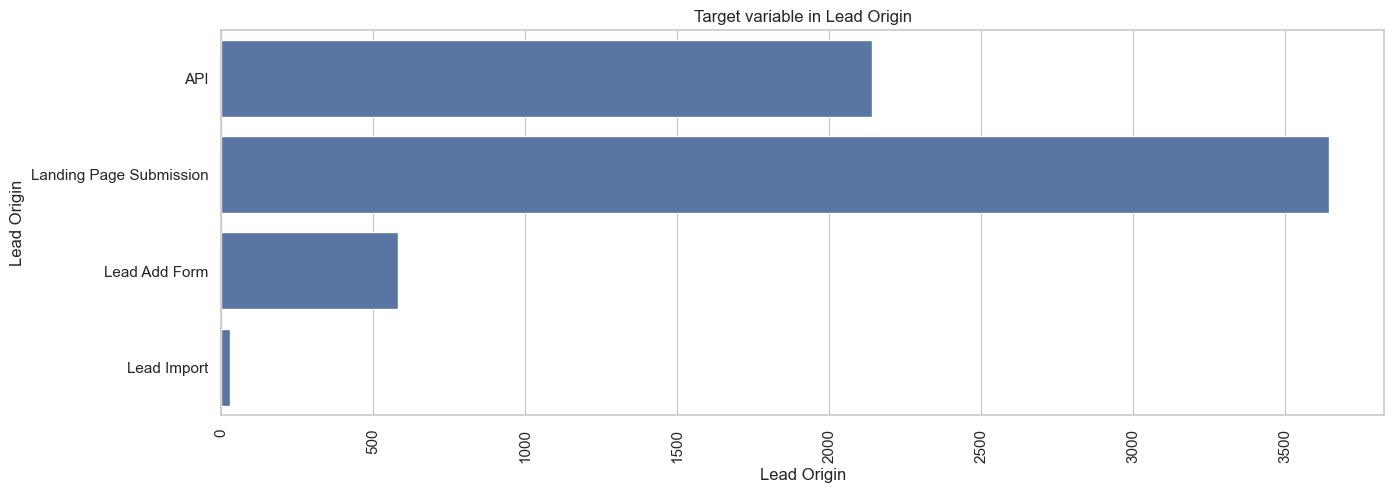

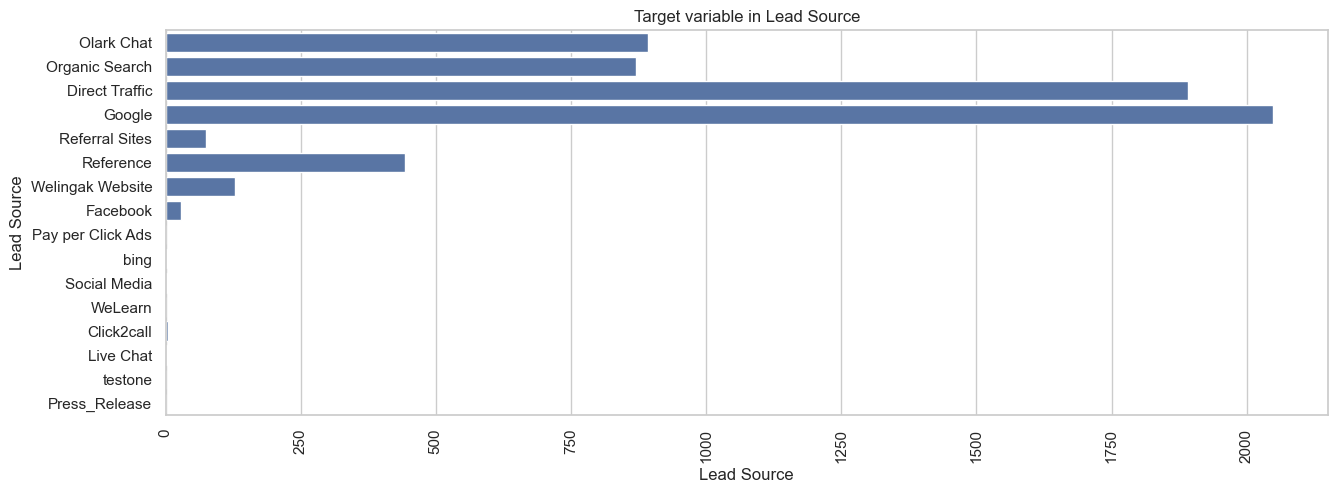

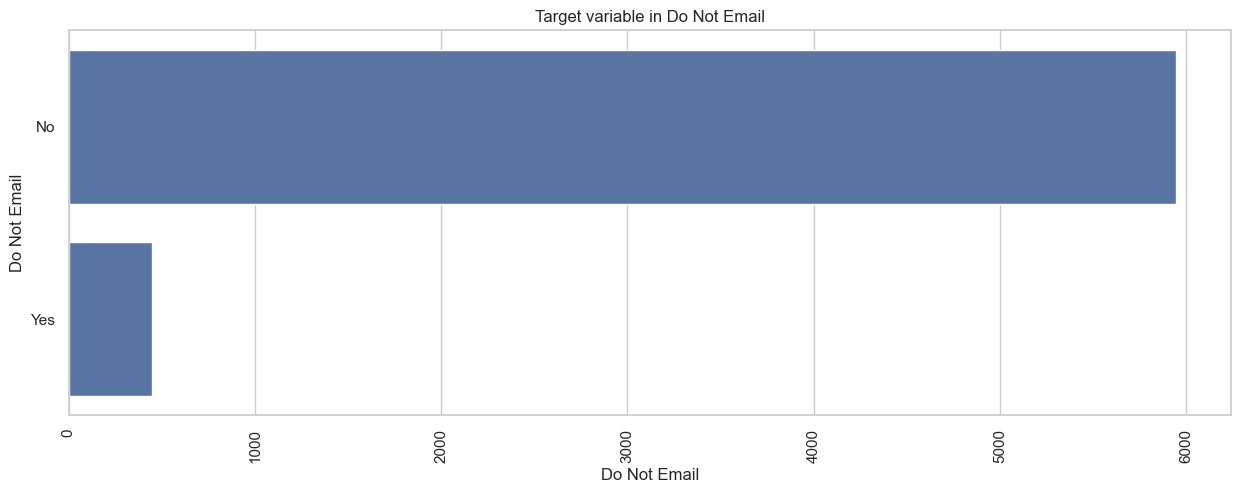

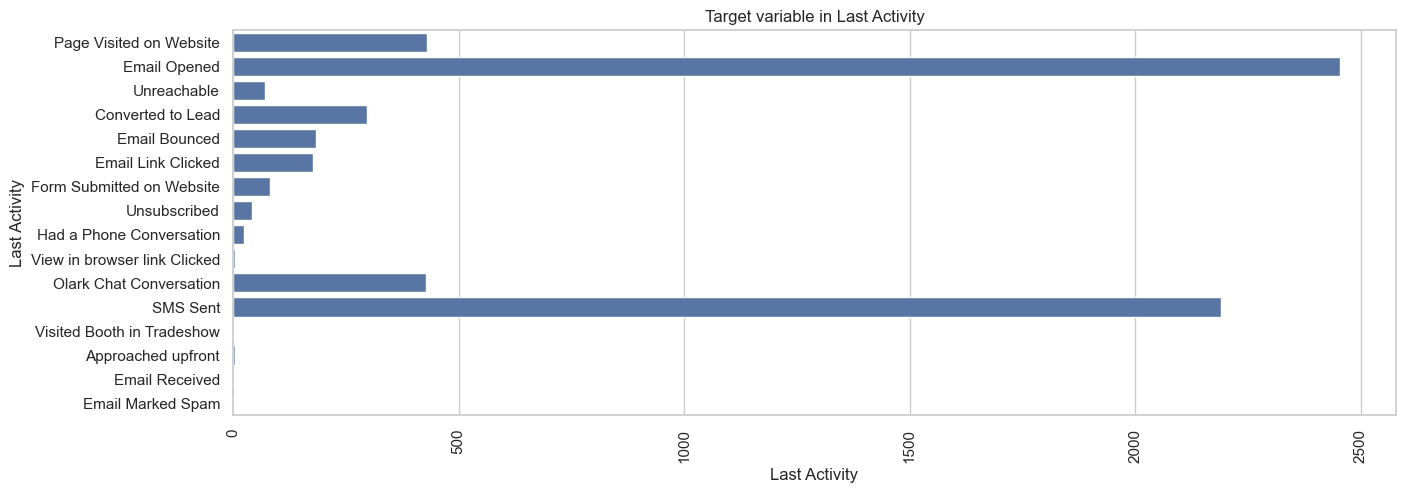

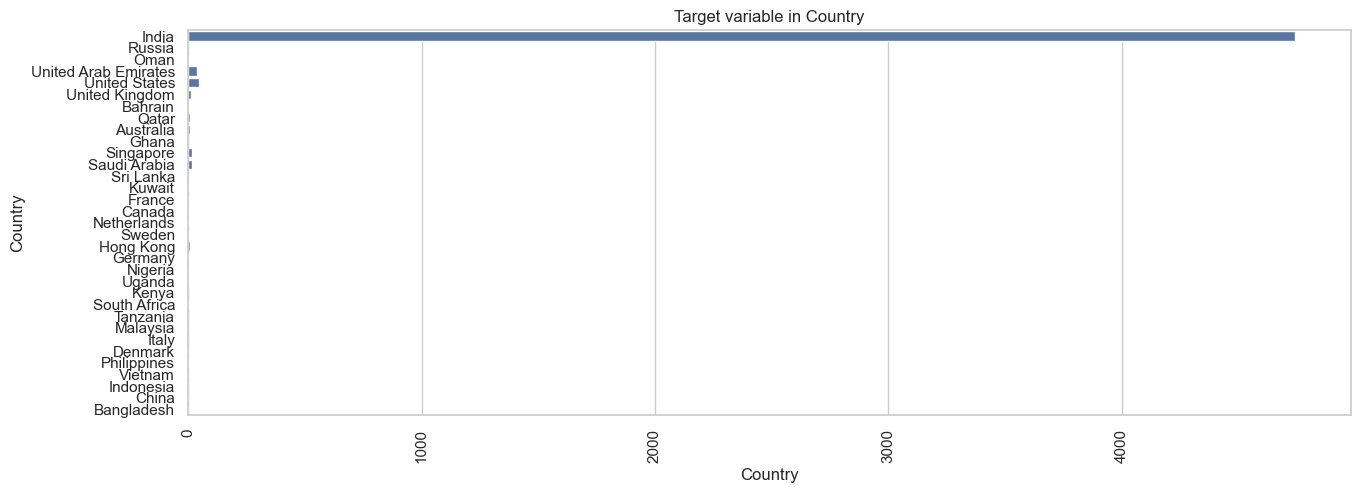

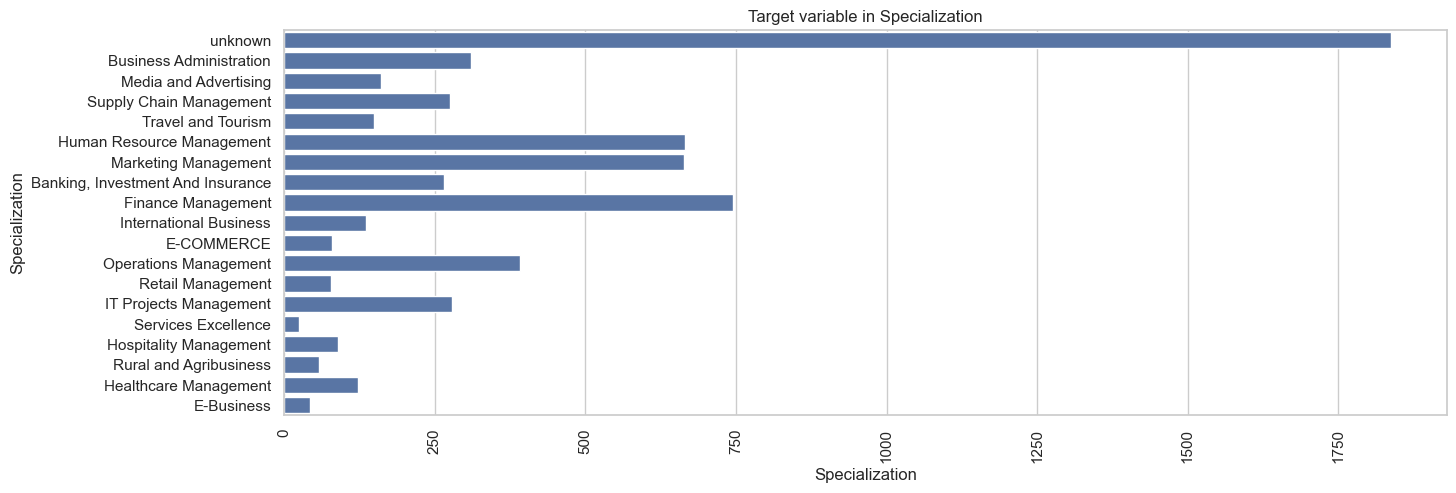

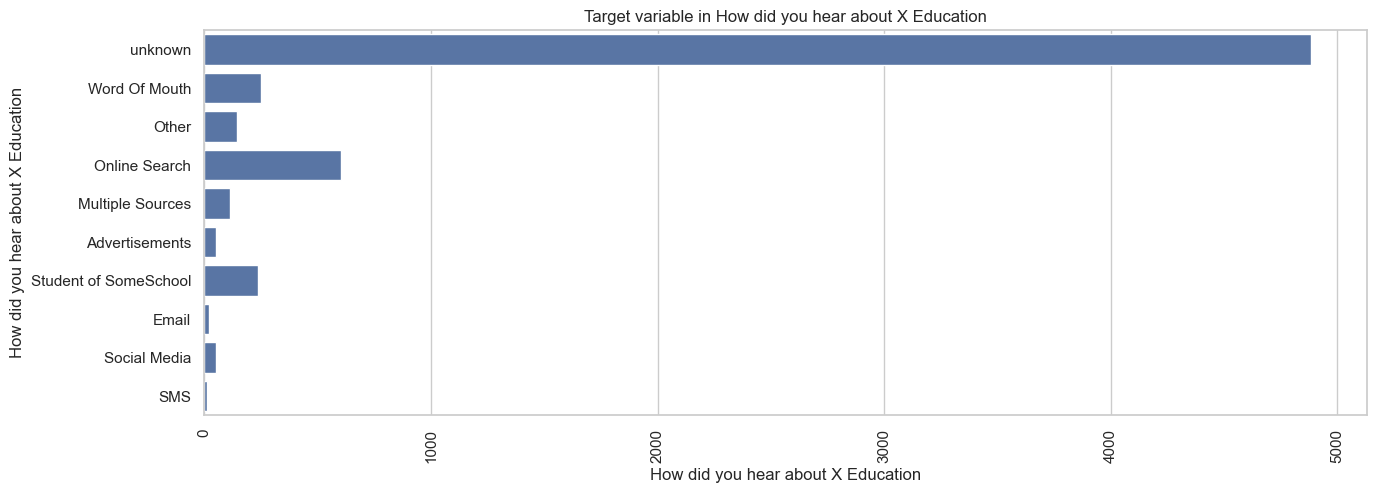

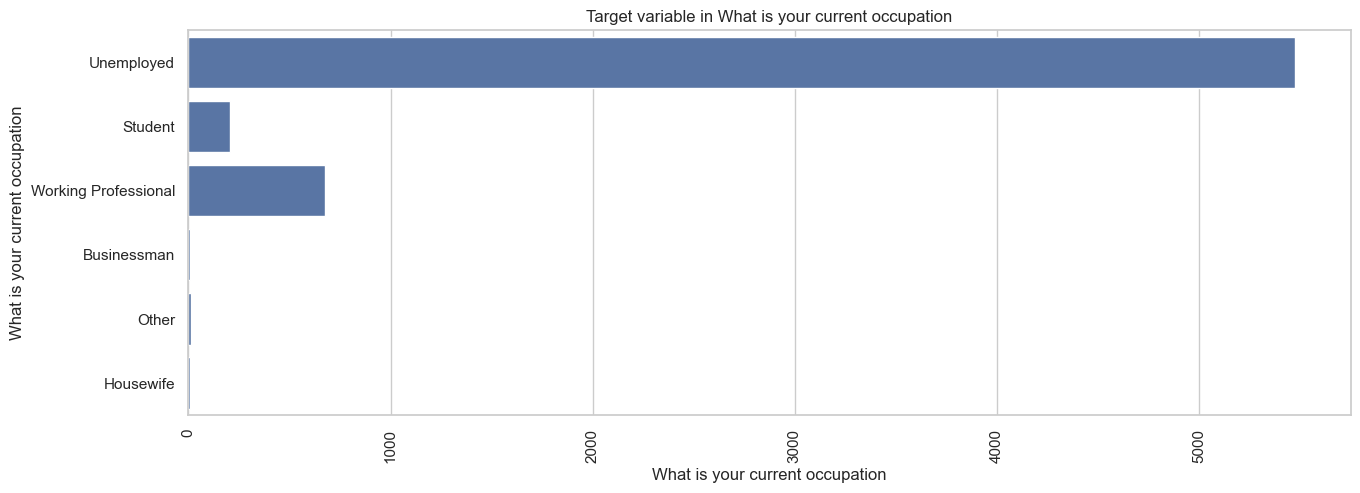

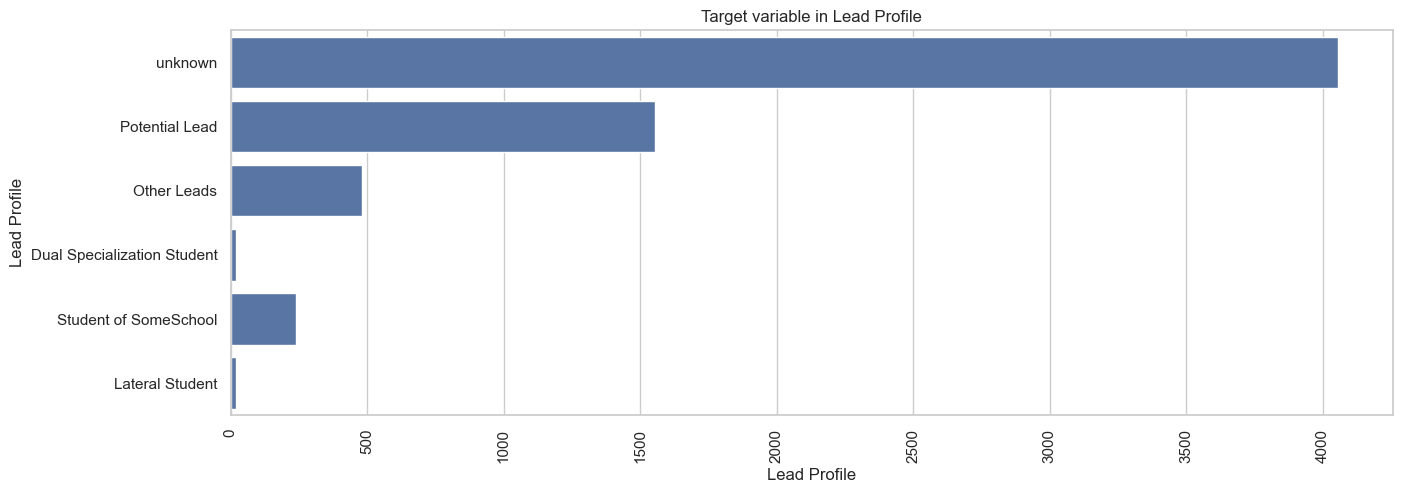

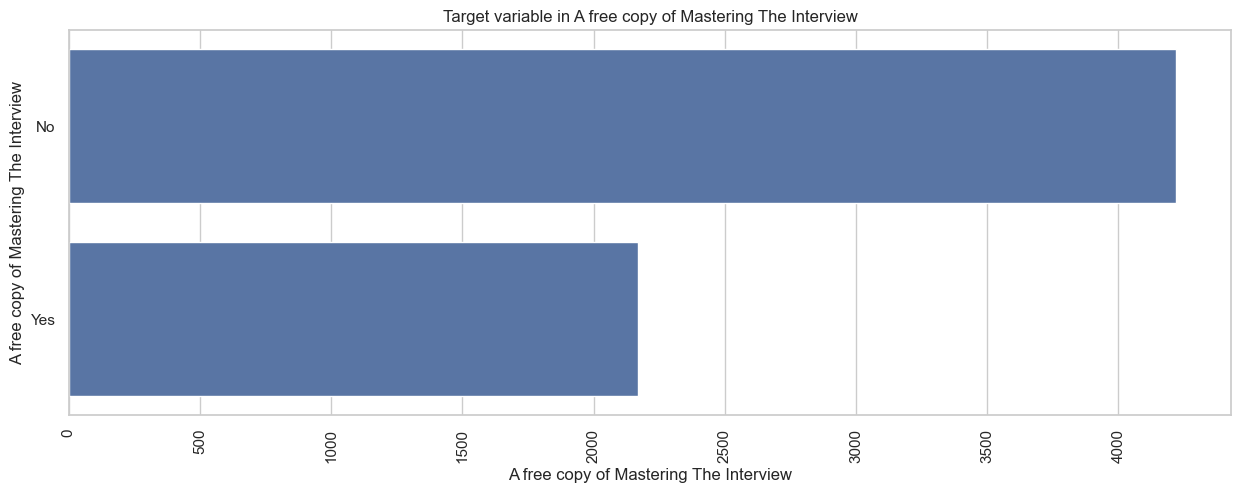

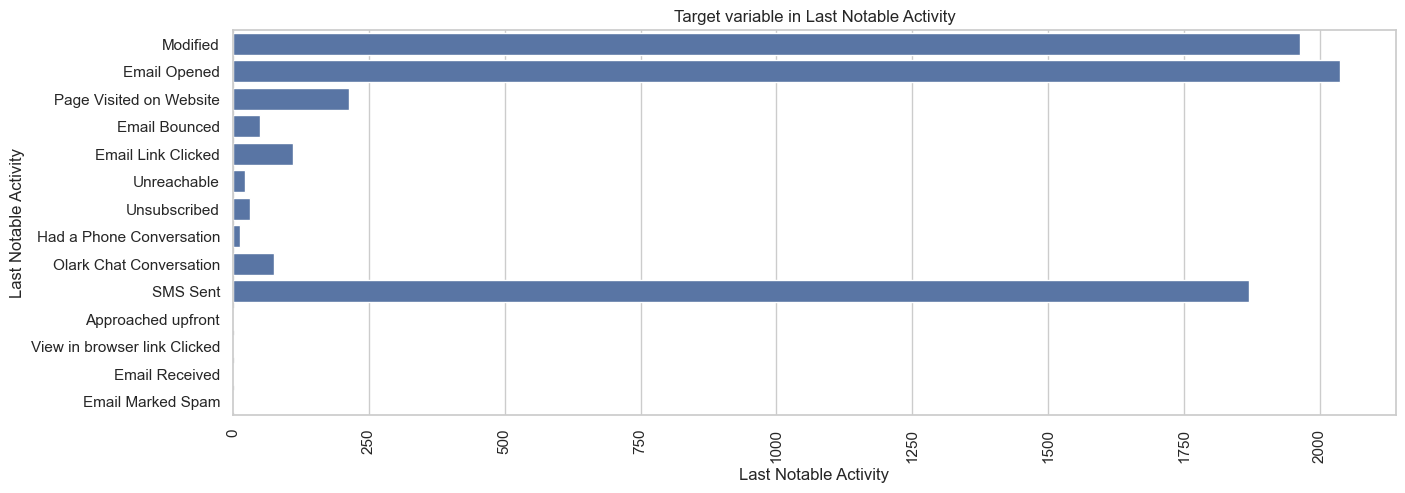

In [42]:
conv = df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(df[i],)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

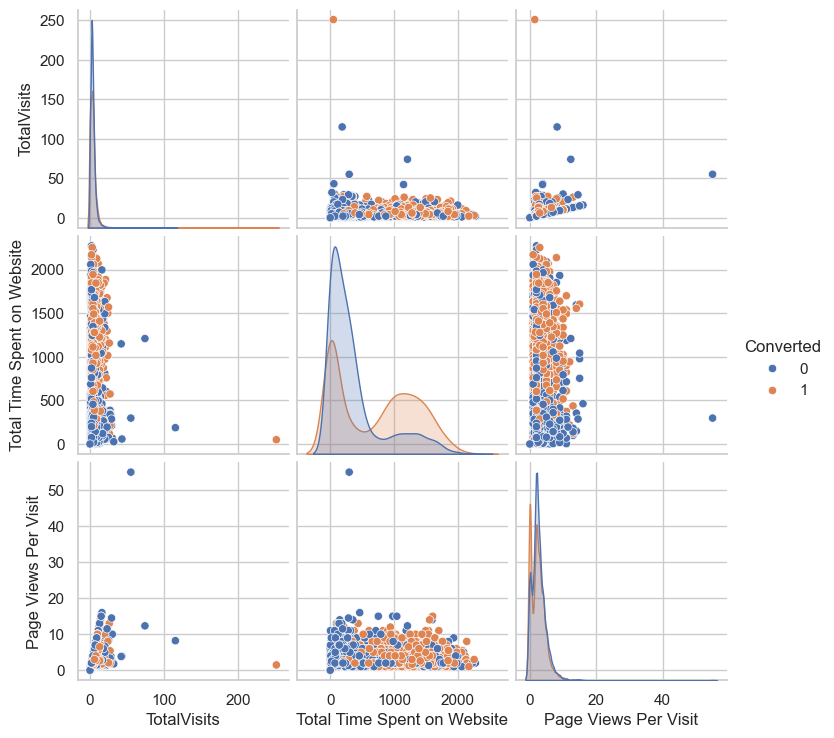

In [43]:
x_edu = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

### Label encoder creation for the categorical variables



In [44]:
cat_col = df.loc[:, df.dtypes == 'object']
cat_col.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in cat_col :
    df[i] = label_encoder.fit_transform(df[i])

In [46]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,0,5,0,0,0.0,0,0.0,10,33,18,9,4,5,0,7
1,0,6,0,0,5.0,674,2.5,5,10,18,9,4,5,0,4
2,1,1,0,1,2.0,1532,2.0,5,10,1,9,3,3,1,4
3,1,1,0,0,1.0,305,1.0,12,10,11,8,4,5,0,7
4,1,3,0,1,2.0,1428,1.0,1,10,18,4,4,5,0,7


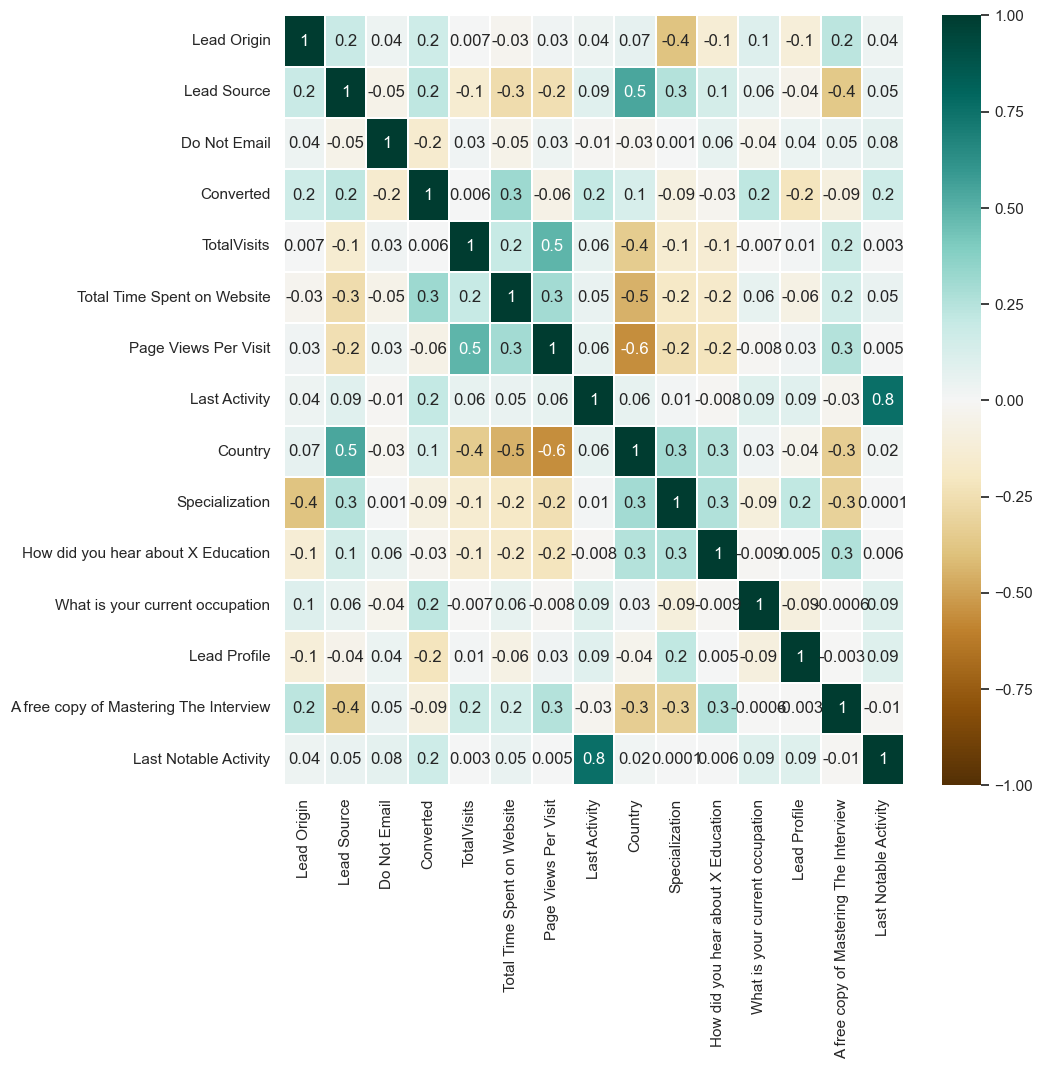

In [47]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1, fmt='.1g' )
plt.show()

In [48]:
#dropping the column "Last Activity" as it is highly correlated with the last notable activity , which in turn can cause heteroscedacity.

In [49]:
df.drop("Last Activity",axis = 1 , inplace = True)

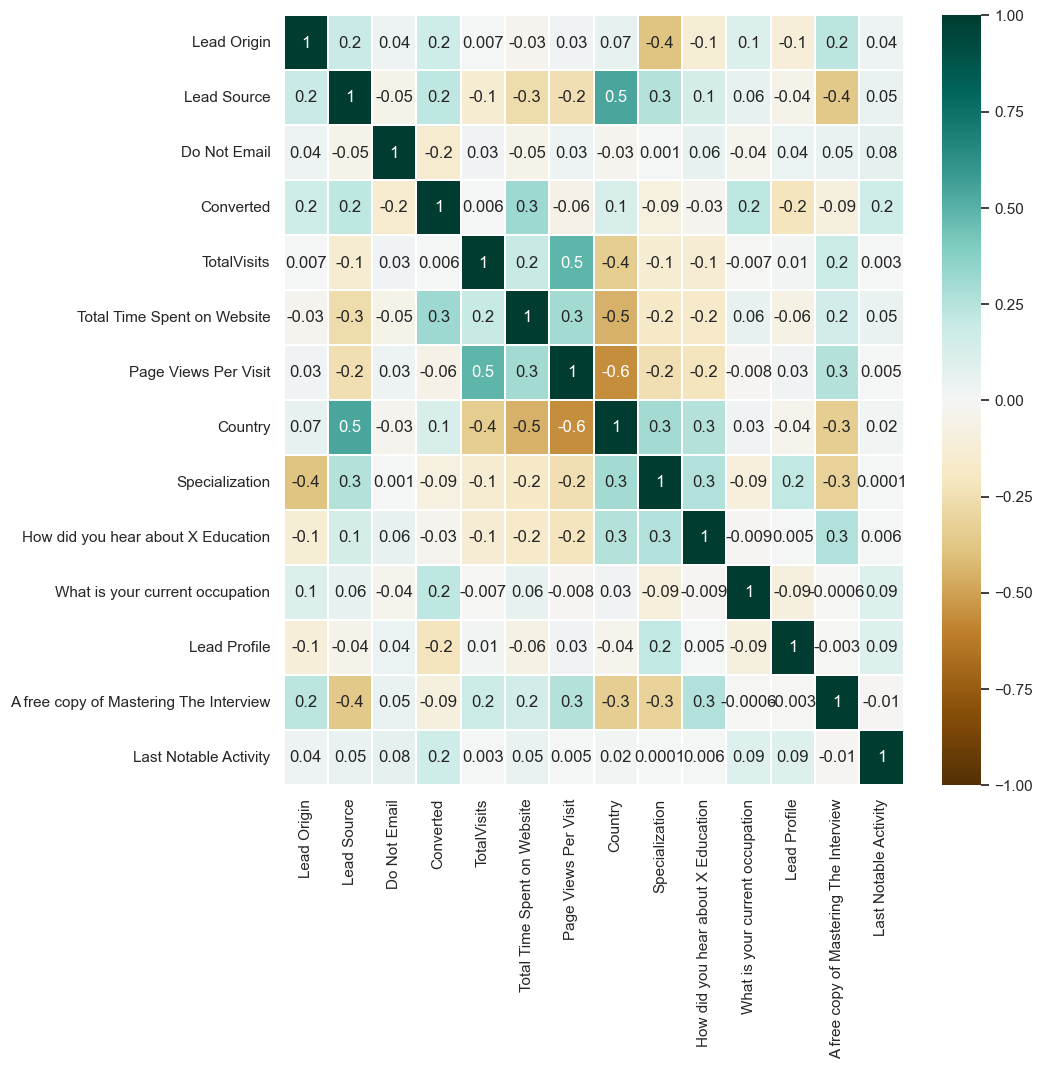

In [50]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1, fmt='.1g' )
plt.show()

### Test-Train Split
The next step is to spliting the dataset into training an testing sets.



In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Put all the feature variables in X

X = df.drop(['Converted','Specialization','Country','How did you hear about X Education'], axis = 1)
X.head()


,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,0,5,0,0.0,0,0.0,4,5,0,7
1,0,6,0,5.0,674,2.5,4,5,0,4
2,1,1,0,2.0,1532,2.0,3,3,1,4
3,1,1,0,1.0,305,1.0,4,5,0,7
4,1,3,0,2.0,1428,1.0,4,5,0,7


In [53]:
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [55]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4473, 10)
y_train Size (4473,)


### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
v  = list(X_train.columns)
v

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'What is your current occupation',
 'Lead Profile',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [58]:
scaler = MinMaxScaler()

X_train[v] = scaler.fit_transform(X_train[v])

X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
533,0.333333,0.428571,0.0,0.011952,0.364877,0.1875,1.0,0.833333,1.0,0.307692
846,0.666667,0.642857,0.0,0.000000,0.000000,0.0000,0.8,0.500000,0.0,0.307692
7546,0.333333,0.428571,0.0,0.035857,0.372359,0.5625,0.8,0.500000,1.0,0.769231
8631,0.000000,0.428571,0.0,0.019920,0.397447,0.3125,0.8,0.833333,0.0,0.538462
7824,0.333333,0.071429,0.0,0.003984,0.081866,0.0625,0.8,0.833333,0.0,0.538462


In [59]:
X_train.corr()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
Lead Origin,1.000000,0.186072,0.040576,0.004482,-0.019416,0.033323,0.114252,-0.112738,0.229875,0.035330
Lead Source,0.186072,1.000000,-0.044246,-0.148190,-0.258537,-0.253488,0.067052,-0.051889,-0.353690,0.053021
Do Not Email,0.040576,-0.044246,1.000000,0.018291,-0.061346,0.024171,-0.027833,0.040772,0.051632,0.080161
TotalVisits,0.004482,-0.148190,0.018291,1.000000,0.194901,0.445922,-0.001829,0.017502,0.184377,0.002613
Total Time Spent on Website,-0.019416,-0.258537,-0.061346,0.194901,1.000000,0.321541,0.039409,-0.064992,0.165305,0.047758
Page Views Per Visit,0.033323,-0.253488,0.024171,0.445922,0.321541,1.000000,-0.006874,0.026392,0.253257,-0.000528
What is your current occupation,0.114252,0.067052,-0.027833,-0.001829,0.039409,-0.006874,1.000000,-0.087342,0.006745,0.090479
Lead Profile,-0.112738,-0.051889,0.040772,0.017502,-0.064992,0.026392,-0.087342,1.000000,0.006340,0.084597
A free copy of Mastering The Interview,0.229875,-0.353690,0.051632,0.184377,0.165305,0.253257,0.006745,0.006340,1.000000,-0.001225
Last Notable Activity,0.035330,0.053021,0.080161,0.002613,0.047758,-0.000528,0.090479,0.084597,-0.001225,1.000000


## Step 2: Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [60]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [61]:
# Importing the 'RFE' and select 8 variables

rfe = RFE(logreg,n_features_to_select=8)             # running RFE with 8 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('What is your current occupation', True, 1),
 ('Lead Profile', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Last Notable Activity', True, 1)]

In [63]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [64]:
# Select only the columns selected by RFE

X_train = X_train[col]

### Model 1


In [65]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4464
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2269.6
Date:                Sun, 19 Jan 2025   Deviance:                       4539.2
Time:                        11:43:07   Pearson chi2:                 4.88e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3086
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -5.5128      0.462    -11.927      0.000      -6.419      -4.607
Lead Origin                         1.3135      0.186      7.067      0.000       0.949       1.678
Lead Source                         3.5424      0.219     16.167      0.000       3.113       3.972
Do Not Email                       -1.5317      0.177     -8.635      0.000      -1.879      -1.184
Total Time Spent on Website         4.0595      0.172     23.563      0.000       3.722       4.397
Page Views Per Visit               -2.4026      0.316     -7.595      0.000      -3.023      -1.783
What is your current occupation     5.3980      0.525     10.288      0.000       4.370       6.426
Lead Profile                       -2.6674      0.203    -13.129      0.000      -3.066      -2.269
Last Notable Activity               2.1542      0.194     11.115      0.000       1.774       2.534
===================================================================================================
"""

### Checking VIF

In [66]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,What is your current occupation,22.74
6,Lead Profile,13.40
7,Last Notable Activity,8.39
1,Lead Source,3.38
4,Page Views Per Visit,2.81
0,Lead Origin,2.67
3,Total Time Spent on Website,2.23
2,Do Not Email,1.09


In [67]:
# "What is your current occupation" seems to have high VIF value , dropping the variable.

In [68]:
X_train.drop('What is your current occupation', axis = 1, inplace = True)

### Model 2


In [69]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4465
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2334.0
Date:                Sun, 19 Jan 2025   Deviance:                       4668.0
Time:                        11:43:07   Pearson chi2:                 4.60e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2884
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.2200      0.187     -6.509      0.000      -1.587      -0.853
Lead Origin                     1.4345      0.182      7.893      0.000       1.078       1.791
Lead Source                     3.5675      0.216     16.492      0.000       3.144       3.991
Do Not Email                   -1.5557      0.174     -8.934      0.000      -1.897      -1.214
Total Time Spent on Website     4.0559      0.170     23.868      0.000       3.723       4.389
Page Views Per Visit           -2.2910      0.310     -7.386      0.000      -2.899      -1.683
Lead Profile                   -2.7286      0.199    -13.720      0.000      -3.118      -2.339
Last Notable Activity           2.2831      0.191     11.965      0.000       1.909       2.657
===============================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Profile,7.65
6,Last Notable Activity,7.08
1,Lead Source,3.06
4,Page Views Per Visit,2.73
0,Lead Origin,2.51
3,Total Time Spent on Website,2.13
2,Do Not Email,1.09


In [71]:
#droppiing the "Lead Profile" from the data

In [72]:
X_train.drop('Lead Profile', axis = 1, inplace = True)

### Model 3

In [73]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2432.2
Date:                Sun, 19 Jan 2025   Deviance:                       4864.4
Time:                        11:43:07   Pearson chi2:                 4.59e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2564
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.0056      0.140    -21.473      0.000      -3.280      -2.731
Lead Origin                     1.6635      0.176      9.457      0.000       1.319       2.008
Lead Source                     3.6104      0.214     16.865      0.000       3.191       4.030
Do Not Email                   -1.5401      0.171     -9.030      0.000      -1.874      -1.206
Total Time Spent on Website     4.1034      0.167     24.557      0.000       3.776       4.431
Page Views Per Visit           -2.4050      0.303     -7.941      0.000      -2.999      -1.811
Last Notable Activity           1.9260      0.183     10.524      0.000       1.567       2.285
===============================================================================================
"""

In [74]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Notable Activity,4.47
1,Lead Source,2.81
4,Page Views Per Visit,2.52
0,Lead Origin,2.50
3,Total Time Spent on Website,2.11
2,Do Not Email,1.09


## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [75]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

533     0.675932
846     0.734386
7546    0.679809
8631    0.612570
7824    0.274774
4986    0.714022
5542    0.363741
1719    0.468801
4860    0.858500
8609    0.241035
dtype: float64

In [76]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.6759316 , 0.73438586, 0.67980903, 0.61257017, 0.27477372,
       0.71402165, 0.36374055, 0.4688006 , 0.85849986, 0.24103487])

### Creating a dataframe with the actual conversion flag and the predicted probabilities


In [77]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head(10)

,Converted,Conversion_Prob
0,1,0.675932
1,1,0.734386
2,1,0.679809
3,0,0.612570
4,0,0.274774
5,0,0.714022
6,0,0.363741
7,0,0.468801
8,1,0.858500
9,0,0.241035


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.6 else 0

In [78]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.6 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.675932,1
1,1,0.734386,1
2,1,0.679809,1
3,0,0.612570,1
4,0,0.274774,0


### Creating the Confusion matrix

In [79]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2028  321]
 [ 913 1211]]


In [80]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7241225128549073


In [81]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [82]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.57015065913371

In [83]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8633461047254151

### Finding the Optimal Cutoff
Now 0.6 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [84]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

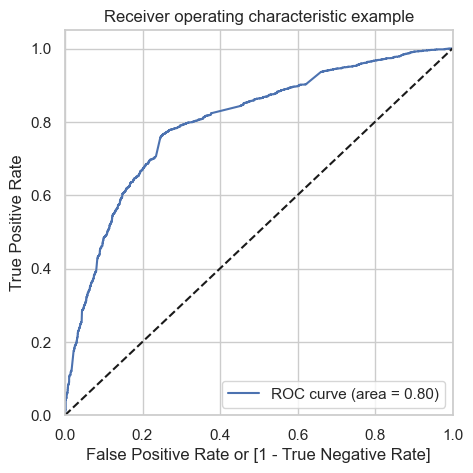

In [86]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.80 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [87]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.675932,1,1,1,1,1,1,1,1,0,0,0
1,1,0.734386,1,1,1,1,1,1,1,1,1,0,0
2,1,0.679809,1,1,1,1,1,1,1,1,0,0,0
3,0,0.612570,1,1,1,1,1,1,1,1,0,0,0
4,0,0.274774,0,1,1,1,0,0,0,0,0,0,0


In [88]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.474849  1.000000  0.000000
0.1   0.1  0.507042  0.994350  0.066411
0.2   0.2  0.582607  0.955744  0.245211
0.3   0.3  0.669349  0.864878  0.492550
0.4   0.4  0.748044  0.782015  0.717327
0.5   0.5  0.737089  0.659605  0.807152
0.6   0.6  0.724123  0.570151  0.863346
0.7   0.7  0.693941  0.461394  0.904215
0.8   0.8  0.641404  0.299906  0.950192
0.9   0.9  0.557344  0.076271  0.992337


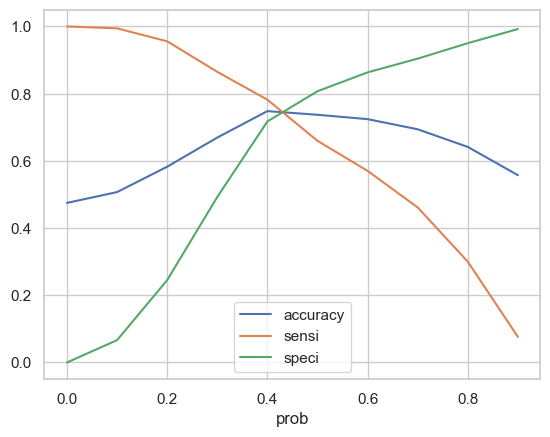

In [89]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [90]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.675932,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.734386,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.679809,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.612570,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.274774,0,1,1,1,0,0,0,0,0,0,0,0


In [91]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7554214173932484

In [92]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1758,  591],
       [ 503, 1621]], dtype=int64)

In [93]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.7631826741996234

In [95]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7484035759897829

## Step 4: Making Predictions on the Test Set
Let's now make predicitons on the test set

In [96]:
X_test

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
2938,1,3,0,4.0,1104,4.00,5,5,0,10
4301,0,5,1,1.0,328,1.00,4,3,1,12
5904,1,6,1,3.0,396,3.00,4,5,1,9
6881,1,6,1,9.0,157,4.50,4,4,0,7
5195,1,3,0,4.0,1298,4.00,4,5,0,10
...,...,...,...,...,...,...,...,...,...,...
5413,1,3,0,7.0,970,2.33,4,3,0,4
7454,0,5,0,0.0,0,0.00,4,5,0,4
8201,1,1,0,2.0,1266,2.00,4,4,1,7
7979,0,6,0,3.0,1025,3.00,4,5,0,10


In [97]:
X_test[v] =  scaler.transform(X_test[v])

In [98]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,Last Notable Activity
2938,0.333333,0.214286,0.0,0.485915,0.25000,1.0,0.833333,0.769231
4301,0.000000,0.357143,1.0,0.144366,0.06250,0.8,0.500000,0.923077
5904,0.333333,0.428571,1.0,0.174296,0.18750,0.8,0.833333,0.692308
6881,0.333333,0.428571,1.0,0.069102,0.28125,0.8,0.666667,0.538462
5195,0.333333,0.214286,0.0,0.571303,0.25000,0.8,0.833333,0.769231


In [99]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [100]:
# Checking X_test_sm

X_test_sm


,const,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,Last Notable Activity
2938,1.0,0.333333,0.214286,0.0,0.485915,0.250000,1.0,0.833333,0.769231
4301,1.0,0.000000,0.357143,1.0,0.144366,0.062500,0.8,0.500000,0.923077
5904,1.0,0.333333,0.428571,1.0,0.174296,0.187500,0.8,0.833333,0.692308
6881,1.0,0.333333,0.428571,1.0,0.069102,0.281250,0.8,0.666667,0.538462
5195,1.0,0.333333,0.214286,0.0,0.571303,0.250000,0.8,0.833333,0.769231
...,...,...,...,...,...,...,...,...,...
5413,1.0,0.333333,0.214286,0.0,0.426937,0.145625,0.8,0.500000,0.307692
7454,1.0,0.000000,0.357143,0.0,0.000000,0.000000,0.8,0.833333,0.307692
8201,1.0,0.333333,0.071429,0.0,0.557218,0.125000,0.8,0.666667,0.538462
7979,1.0,0.000000,0.428571,0.0,0.451144,0.187500,0.8,0.833333,0.769231


In [101]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Profile','What is your current occupation'], axis = 1, inplace = True)

In [102]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [103]:
y_test_pred[:10]

2938    0.767945
4301    0.261847
5904    0.300216
6881    0.141889
5195    0.824498
7243    0.691780
901     0.891456
3943    0.336463
4971    0.720363
1792    0.358838
dtype: float64

In [104]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [105]:
# Let's see the head

y_pred_1.head()

,0
2938,0.767945
4301,0.261847
5904,0.300216
6881,0.141889
5195,0.824498


In [106]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [107]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [109]:

# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.767945
1,0,0.261847
2,0,0.300216
3,0,0.141889
4,1,0.824498


In [110]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [111]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.767945
1,0,0.261847
2,0,0.300216
3,0,0.141889
4,1,0.824498


In [113]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [114]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.767945,1
1,0,0.261847,0
2,0,0.300216,0
3,0,0.141889,0
4,1,0.824498,1


In [115]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7450469238790407

In [116]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[714, 263],
       [226, 715]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7598299681190224

In [119]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7308085977482088

### Precision-Recall View
Let's now also build the training model using the precision-recall view

In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2028,  321],
       [ 913, 1211]], dtype=int64)

In [121]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7904699738903395

In [122]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.57015065913371

### Precision and recall tradeoff
Importing the Precision recall curve library

In [123]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 4468    0
 4469    0
 4470    1
 4471    0
 4472    0
 Name: Converted, Length: 4473, dtype: int64,
 0       1
 1       1
 2       1
 3       1
 4       0
        ..
 4468    1
 4469    1
 4470    1
 4471    0
 4472    0
 Name: Predicted, Length: 4473, dtype: int64)

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

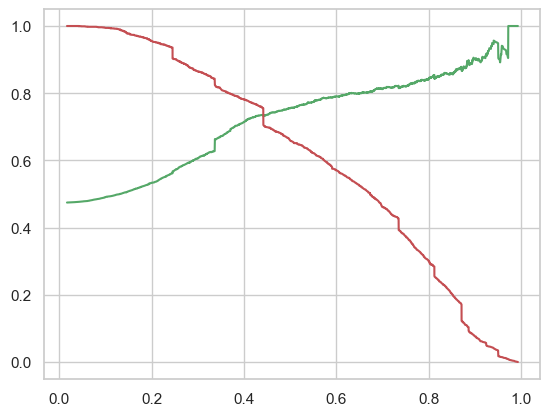

In [125]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.675932,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.734386,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.679809,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.612570,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.274774,0,1,1,1,0,0,0,0,0,0,0,0


In [127]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7547507265817125

In [128]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1770,  579],
       [ 518, 1606]], dtype=int64)

In [129]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision

In [130]:
TP/(TP+FP)

0.7350114416475972

### Recall

In [131]:
TP/(TP+FN)

0.756120527306968

## Step 5: Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [133]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [134]:
y_test_pred[:10]

2938    0.767945
4301    0.261847
5904    0.300216
6881    0.141889
5195    0.824498
7243    0.691780
901     0.891456
3943    0.336463
4971    0.720363
1792    0.358838
dtype: float64

In [135]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Let's see the head

y_pred_1.head()

,0
2938,0.767945
4301,0.261847
5904,0.300216
6881,0.141889
5195,0.824498


In [137]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [138]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
# Checking the 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.767945
1,0,0.261847
2,0,0.300216
3,0,0.141889
4,1,0.824498


In [141]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [142]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.767945
1,0,0.261847
2,0,0.300216
3,0,0.141889
4,1,0.824498


In [143]:
# Making predictions on the test set using 0.43 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [144]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.767945,1
1,0,0.261847,0
2,0,0.300216,0
3,0,0.141889,0
4,1,0.824498,1


In [145]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7450469238790407

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[714, 263],
       [226, 715]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Calculating the Precision

TP/(TP+FP)

0.7310838445807771

In [149]:
# Calculating Recall

TP/(TP+FN)

0.7598299681190224

## Conclusion :

Factors driving the lead score are :

'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Notable Activity'